In [17]:
#
# Cox-Ross-Rubinstein Binomial Model
#

In [18]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
from BSM_European_Option import BSM_call_value

In [19]:
#
# Model Parameters
#

In [23]:
S0 = 100.0 # index level
K = 100.0 # option strike
T = 1.0 # maturity date
r = 0.05 # risk-less short rate
sigma = 0.2 # volatility

# Valuation function
def CRR_option_value(S0, K, T, r, sigma, otype, M=4):
    ''' Cox-Ross-Rubinstein European option valuation.
    
    Parameters
    =============
    S0: float
        stock/index level at time 0
    K: float
       strike price
    t: float
       valuation date
    T: float
       date of the maturity
    r: float
       constant, risk-less short rate
    sigma: float
        volatility
    otype: string
           either 'call' or 'put'
    M: int
       number of time intervals
    '''
    
    # Time Parameters
    dt = T / M # length of time interval
    df = math.exp(-r * dt) # discount per interval
    
    # Binomial Parameters
    u = math.exp(sigma * math.sqrt(dt)) # up movement
    d = 1 / u # down movement
    q = (math.exp(r * dt) - d) / (u - d) # martingale branch probability
    
    # Array Initialization for Index Levels
    mu = np.arange(M + 1)
    mu = np.resize(mu, (M + 1, M + 1))
    md = np.transpose(mu)
    mu = u ** (mu - md)
    md = d ** md
    S = S0 * mu  * md
    
    # Inner Values
    if otype == 'call':
        V = np.maximum(S - K, 0) # inner values for European call option
    else:
        V = np.maximum(K - S, 0) # inner values for European put option
        
    z = 0
    for t in range(M - 1, -1, -1): # backwards iteration
        V[0:M - z, t] = (q * V[0:M - z, t + 1] 
                      + (1 - q) * V[1:M - z + 1, t + 1]) * df
        z += 1
    
    return V[0, 0]

In [24]:
def plot_convergence(nmin, nmax, step_size):
    ''' Plots the CRR option values for increasing number of time 
    intervals M against the Black-Scholes-Merton benchmark value. '''
    BSM_benchmark = BSM_call_value(S0, K, 0, T, r, sigma)
    m = range(nmin, nmax, step_size)
    CRR_values = [CRR_option_value(S0, K, T, r, sigma, 'call', M) for M in m]
    plt.figure(figsize=(9, 5))
    plt.plot(m, CRR_values, label='CRR values')
    plt.axhline(BSM_benchmark, color='r', ls='dashed', lw=1.5, label='BSM benchmark')
    
    plt.grid()
    plt.xlabel(' # of binomial steps $M$')
    plt.ylabel('European call option value')
    plt.legend(loc=4)
    plt.xlim(0, nmax)
    

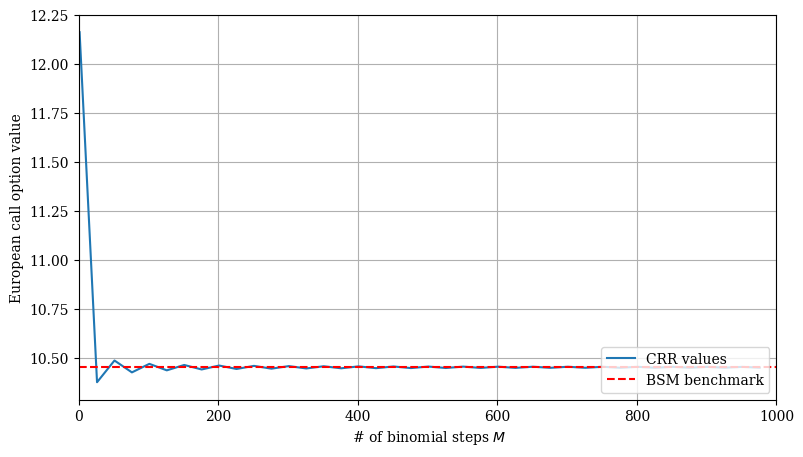

In [27]:
plot = plot_convergence(1, 1000, 25)